In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb

In [9]:
study = "docnet"
subj_list=["docnet2001", "docnet2002","docnet2003","docnet2004", "docnet2005", "docnet2007",
"docnet2008", "docnet2012","docnet2013", "docnet2014", "docnet2015", "docnet2016"]

study_dir = f"/lab_data/behrmannlab/vlad/{study}"
fig_dir = f'/user_data/vayzenbe/GitHub_Repos/docnet/figures'
curr_dir = '/user_data/vayzenbe/GitHub_Repos/docnet/'
results_dir = f'{curr_dir}/results'
rois = ['PPC_spaceloc', 'APC_spaceloc', 'LO_toolloc', 'PFS_toolloc','APC_distloc',]
roi_names = ['PPC', 'APC', 'LO', 'PFS', 'PPC_dist']

exps = ['catmvpa']
copes = [1, 1, 1, 1, 5]
suf = '_roi'


cond_names = ['Space', 'Feature' ,'3D Shape', '2D Shape', 'Tools', 'Non-tools', 'Distance', 'Brightness']
models = ['skel', 'cornet_s', 'gbj']

num_vox = 100

#template = datasets.load_mni152_template()

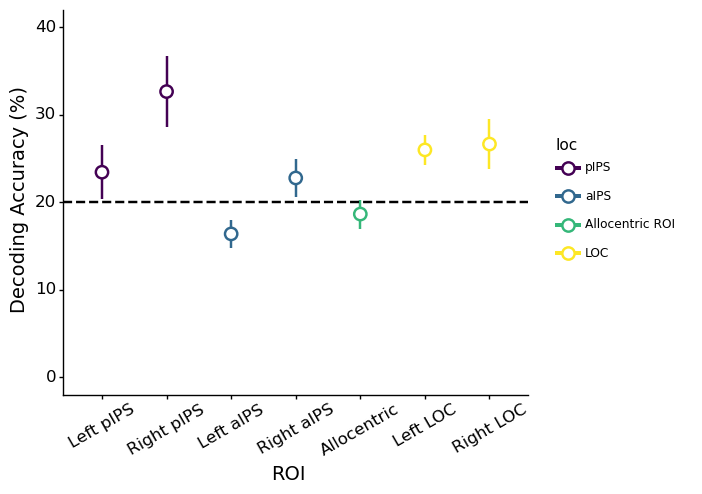

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/docnet/decoding/cat_decoding_point.png


In [5]:
"""
plot decoding accuracy
"""

rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc', 'lAPC_distloc','lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS', 'Allocentric', 'Left LOC', 'Right LOC']

roi_pos = ['pIPS', 'pIPS', 'aIPS', 'aIPS', 'Allocentric ROI', 'LOC', 'LOC']
roi_pos_cat = ['pIPS',  'aIPS', 'Allocentric ROI', 'LOC']


summary_df = pd.DataFrame(columns = ["roi",'loc','acc' "se"])
summary_df['roi'] = roi_names
summary_df['loc'] = roi_pos


df = pd.read_csv(f"{results_dir}/decoding_summary_single_roi.csv")
df = df[rois]
df = df * 100
summary_df['acc'] = df.mean().to_list()
summary_df['se'] = df.sem().to_list()

summary_df['roi'] = pd.Categorical(summary_df['roi'], categories = roi_names, ordered = False)
summary_df['loc'] = pd.Categorical(summary_df['loc'], categories = roi_pos_cat, ordered = True)

plot = ggplot(summary_df, aes(x='roi', y='acc',color = 'loc')) + geom_linerange(aes(x='roi',  ymax = f'acc + se', ymin = f'acc - se'), size = 1) + \
        geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0, 40) + geom_hline(yintercept=20,linetype='dashed', size = 1) + \
        theme_classic() + xlab('ROI') + ylab('Decoding Accuracy (%)') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            figure_size = (6, 5))

print(plot)
plot.save(f'{fig_dir}/docnet/decoding/cat_decoding_point.png', width=6, height=5, dpi = 300)

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_linerange : Removed 1 rows containing missing values.


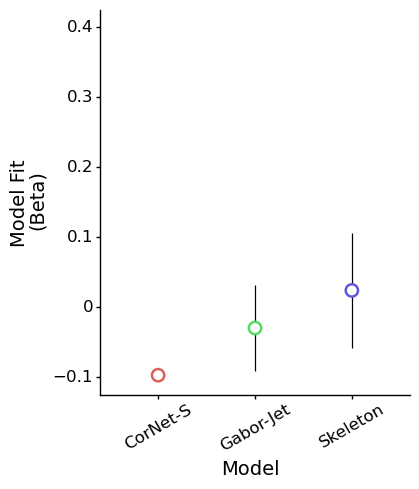

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_linerange : Removed 1 rows containing missing values.


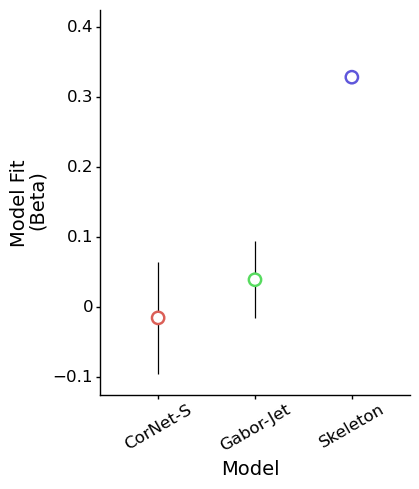

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_linerange : Removed 2 rows containing missing values.


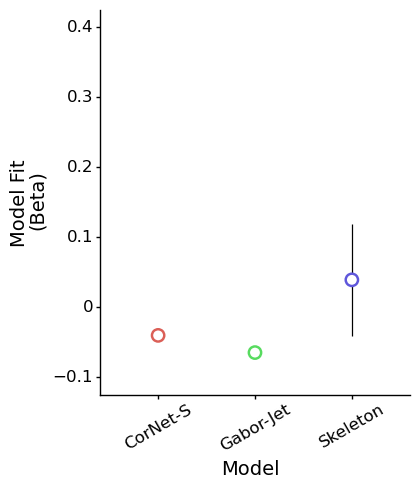

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_linerange : Removed 1 rows containing missing values.


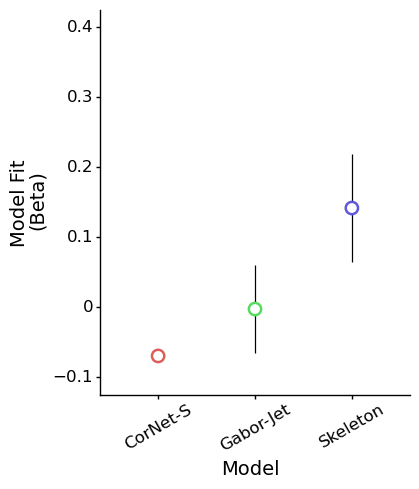

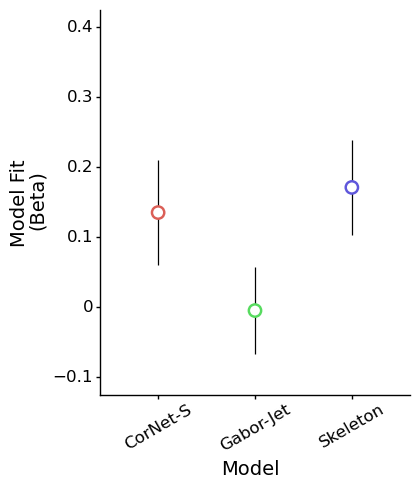

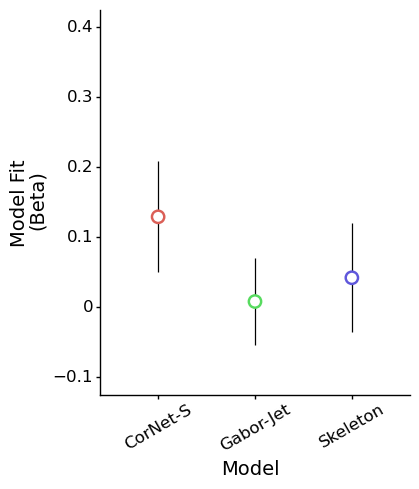

In [48]:
"""
plot RSA betas
"""

rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc', 'lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS',  'Left LO', 'Right LO']
roi_pos = ['pIPS', 'pIPS', 'aIPS', 'aIPS', 'LO', 'LO']
roi_pos_cat = ['pIPS',  'aIPS','LO']
models = ['skel', 'gbj','cornet_s',]
model_names = ['Skeleton',  'Gabor-Jet', 'CorNet-S',]

for rr in rois:
    df = pd.read_csv(f"{results_dir}/RSA_betas.csv")

    curr_roi = df[[m + '_beta' for m in models]][df['roi'] == rr]
    curr_roi = pd.melt(curr_roi, var_name = 'model', value_name = 'Beta')
            
    curr_se = df[[m + '_se' for m in models]][df['roi'] == rr]
    curr_se = pd.melt(curr_se, var_name = 'model', value_name = 'Beta')
    curr_roi['se'] = curr_se['Beta']

    curr_roi['model'] = model_names
    summary_df['model'] = pd.Categorical(summary_df['model'], categories = roi_names, ordered = False)
        
    plot = ggplot(curr_roi, aes(x='model', y='Beta', color = 'model', fill = 'model')) + geom_linerange(aes(x='model',  ymax = f'Beta + se', ymin = f'Beta - se'), color = 'black') + \
    geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(-.1, .4) + \
    theme_classic() + xlab('Model') + ylab('Model Fit \n(Beta)') + \
        theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                        axis_line=element_line(), 
                                                                        panel_border=element_blank(),
                                                                        legend_position = "none",
                                                                        figure_size = (4, 5))

    print(plot)
    #plot.save(f'{fig_dir}/spaceloc/selectivity/{rr}_selectivity_point.png', width=4, height=5, dpi = 300)
    
    '''
    plot = ggplot(df, aes(x='model', y=ylabel, color = 'model', fill = 'model')) + geom_col(color="black", position =position_dodge(width =1)) + \
    geom_linerange(aes(x='model',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
           scale_x_discrete(limits= models) + \
           theme_classic() + xlab('Model') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (5, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())
    print(plot)
    plot.save(f'{fig_dir}/{roi}_rsa_bar.png', width=5, height=5, dpi = 300)
    '''

In [45]:

curr_roi
    

,model,Beta,se
0,skel_beta,0.024122,0.082161
1,cornet_s_beta,-0.096930,0.078580
2,gbj_beta,-0.029544,0.061289


In [40]:
df

,roi,R,skel_beta,cornet_s_beta,gbj_beta,skel_se,cornet_s_se,gbj_se,skel_beta_ci_low,cornet_s_beta_ci_low,gbj_beta_ci_low,skel_beta_ci_high,cornet_s_beta_ci_high,gbj_beta_ci_high
0,lPPC_spaceloc,0.009058,0.024122,-0.096930,-0.029544,0.082161,0.078580,0.061289,-0.137984,-0.255133,-0.152682,0.186816,0.056470,0.094301
1,rPPC_spaceloc,0.109417,0.328781,-0.015079,0.039416,0.079847,0.079534,0.054648,0.161344,-0.166769,-0.067214,0.483504,0.145141,0.146816
2,lAPC_spaceloc,0.005480,0.039272,-0.040063,-0.064643,0.080042,0.082110,0.059157,-0.120755,-0.192488,-0.185174,0.193509,0.121707,0.050224
3,rAPC_spaceloc,0.011835,0.141851,-0.069428,-0.002464,0.076918,0.077703,0.062941,-0.006922,-0.222333,-0.127784,0.290893,0.081988,0.119672
4,lLO_toolloc,0.077654,0.171314,0.135390,-0.004607,0.068092,0.074831,0.062633,0.037601,-0.008175,-0.125564,0.307368,0.287080,0.119662
5,rLO_toolloc,0.026605,0.042252,0.129312,0.008301,0.078108,0.079511,0.062744,-0.112533,-0.026838,-0.117511,0.192217,0.284948,0.127295


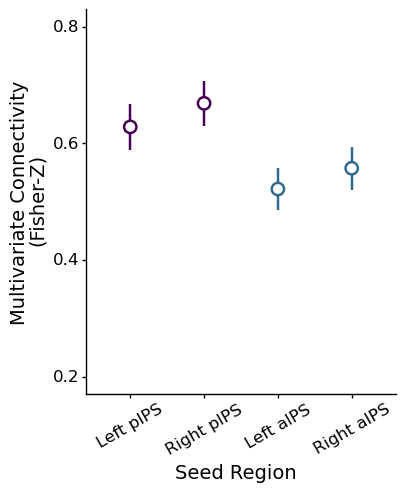

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/docnet/mvpd/lLO_toolloc_mvpd_point.png


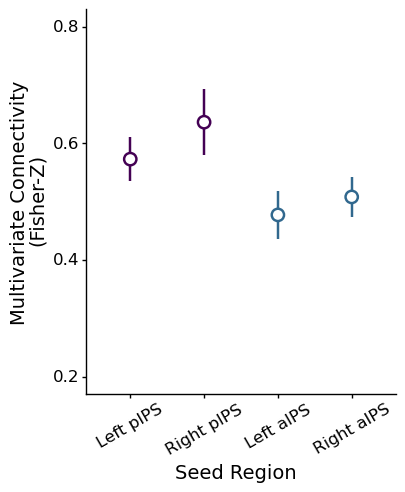

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/docnet/mvpd/rLO_toolloc_mvpd_point.png


In [11]:
"""
plot MVPD
"""
dorsal_rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc']
ventral_rois = ['lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS']
roi_pos = ['pIPS', 'pIPS', 'aIPS', 'aIPS']
roi_pos_cat = ['pIPS', 'aIPS']

for rr in ventral_rois:

    summary_df = pd.DataFrame(columns = ["ROI",'LOC' "FC", "SE"])
    summary_df['ROI'] = roi_names
    summary_df['LOC'] = roi_pos

    df = pd.read_csv(f"{results_dir}/{rr}_mvpd.csv")
    df = df[dorsal_rois]
    #df.columns = cond_names
    summary_df['FC'] = df.mean().to_list()
    summary_df['SE'] = df.sem().to_list()

    summary_df['ROI'] = pd.Categorical(summary_df['ROI'], categories = roi_names, ordered = False)
    summary_df['LOC'] = pd.Categorical(summary_df['LOC'], categories = roi_pos_cat, ordered = False)

    plot = ggplot(summary_df, aes(x='ROI', y='FC',color = 'LOC')) + geom_linerange(aes(x='ROI',  ymax = f'FC + SE', ymin = f'FC - SE'), size = 1) + \
            geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0.2, .8) + \
            theme_classic() + xlab('Seed Region') + ylab('Multivariate Connectivity \n(Fisher-Z)') + \
                scale_color_manual(values = ['#440154', '#31688E', '#33B778']) + \
                theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                axis_line=element_line(), 
                                                                                panel_border=element_blank(),
                                                                                legend_position = "none",
                                                                                figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/docnet/mvpd/{rr}_mvpd_point.png', width=4, height=5, dpi = 300)

In [6]:
df

,lPPC_spaceloc,rPPC_spaceloc,lAPC_spaceloc,rAPC_spaceloc,lAPC_distloc
0,0.458287,0.460961,0.458287,0.507273,0.494339
1,0.453639,0.829478,0.411626,0.458770,0.565618
2,NaN,0.653404,NaN,0.606474,0.706484
3,0.520804,0.676108,0.407809,0.603783,0.439468
4,0.647663,0.821418,0.616236,0.522141,0.520947
5,0.615928,0.462676,0.507388,0.357948,0.324589
6,0.426751,0.585567,0.167999,0.461075,0.170880
7,NaN,0.290511,NaN,0.281292,0.273827
8,0.528334,0.415970,0.593979,0.641063,0.602034
9,0.701847,0.775886,0.481417,0.698252,0.668796


In [4]:
def plot_bar(df, ylabel):

    y_min = np.min(df[ylabel])
    y_max = np.max(df[ylabel])

    plot = ggplot(df, aes(x='Condition', y=ylabel, color = 'model', fill = 'model')) + geom_col(color="black", position =position_dodge(width =1)) + \
    geom_linerange(aes(x='Condition',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
            theme_classic() + xlab('Conditions') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (5, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())

In [5]:
def plot_decoding(df, ylabel, cond):

    y_min = np.min(df[ylabel])
    y_max = np.max(df[ylabel]) +2

    plot = ggplot(df, aes(x='roi', y=ylabel, color = 'roi', fill = 'roi')) + geom_col(color="black", position =position_dodge(width =1)) + \
    geom_linerange(aes(x='roi',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
           scale_x_discrete(limits= rois) + geom_hline(yintercept = .2, size=1,linetype="dashed") + \
           theme_classic() + xlab('ROI') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (15, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())
    print(plot)
    plot.save(f'{fig_dir}/{cond}_decoding_bar.png', width=5, height=5, dpi = 300)

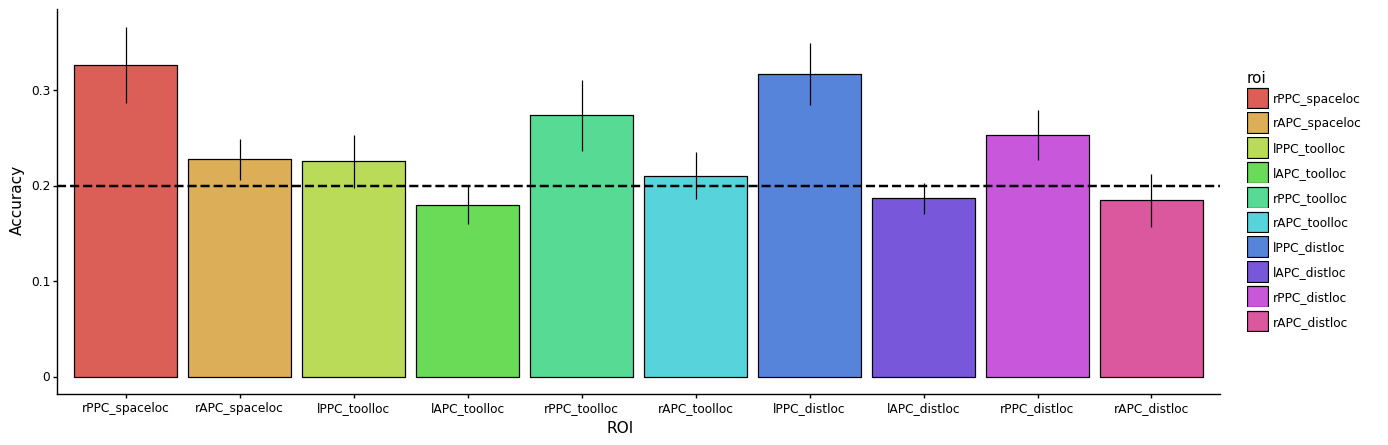

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/single_roi_decoding_bar.png


In [6]:
"""
decoding accuracy
individual ROIs
"""
rois = ['rPPC_spaceloc', 'rAPC_spaceloc','rPPC_depthloc', 'rAPC_depthloc', 'rPPC_toolloc', 'rAPC_toolloc', 'rPPC_distloc', 'rAPC_distloc' ]
rois = ['rPPC_spaceloc', 'rAPC_spaceloc','lPPC_toolloc', 'lAPC_toolloc', 'rPPC_toolloc', 'rAPC_toolloc', 'lPPC_distloc', 'lAPC_distloc', 'rPPC_distloc', 'rAPC_distloc' ]
#rois = ['lLO_toolloc',  'rLO_toolloc', 'lPFS_toolloc','rPFS_toolloc']
#rois = ['lPPC_spaceloc', 'rPPC_spaceloc', 'lAPC_spaceloc', 'rAPC_spaceloc']

df = pd.read_csv(f'/user_data/vayzenbe/GitHub_Repos/docnet/results/decoding_summary_single_roi.csv')
df = df[rois]
df_mean = df.mean(axis = 0)
df_se = df.sem(axis = 0)
df_summary = pd.DataFrame(columns = ['roi', 'mean', 'se'])
df_summary['Accuracy'] = df_mean
df_summary['roi'] = df_mean.index
df_summary['se'] = df_se

df_summary['roi'] = pd.Categorical(df_summary['roi'], categories = rois)
#final_df = df_summary[df_summary['roi'] == 
#df_mean = pd.melt(df,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
plot_decoding(df_summary, 'Accuracy', 'single_roi')

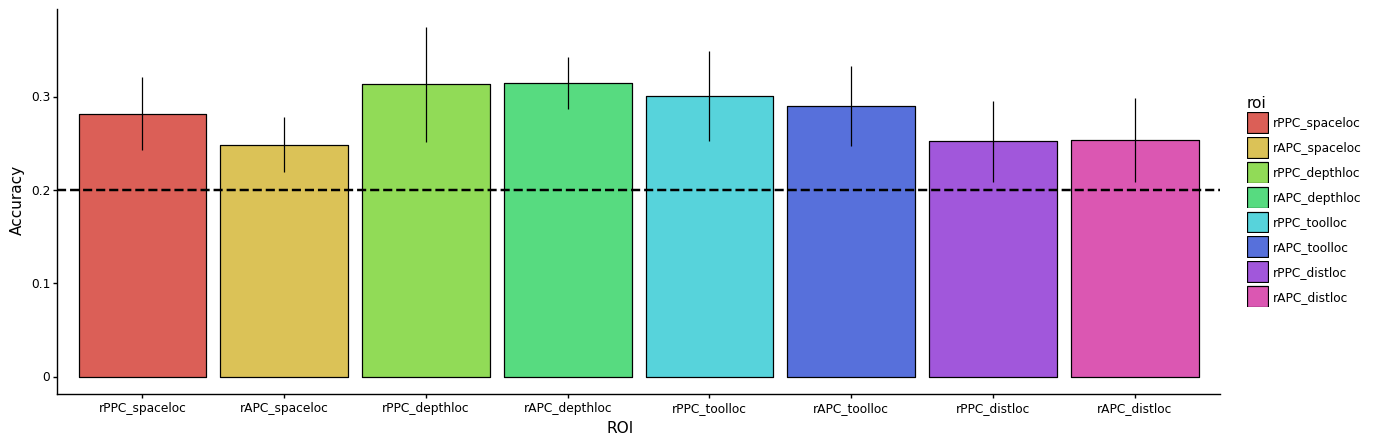

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc_decoding_bar.png


In [16]:
"""
decoding accuracy
combined ROIs
"""
rois = ['rPPC_spaceloc', 'rAPC_spaceloc','rPPC_depthloc', 'rAPC_depthloc', 'rPPC_toolloc', 'rAPC_toolloc', 'rPPC_distloc', 'rAPC_distloc' ]
#rois = ['lLOC',  'rLOC','rPPC_spaceloc', 'rAPC_spaceloc']

df = pd.read_csv(f'/user_data/vayzenbe/GitHub_Repos/docnet/modelling/decoding_summary_combined_roi.csv')
df = df[rois]
df_mean = df.mean(axis = 0)
df_se = df.sem(axis = 0)
df_summary = pd.DataFrame(columns = ['roi', 'mean', 'se'])
df_summary['Accuracy'] = df_mean
df_summary['roi'] = df_mean.index
df_summary['se'] = df_se

df_summary['roi'] = pd.Categorical(df_summary['roi'], categories = rois)
#final_df = df_summary[df_summary['roi'] == 
#df_mean = pd.melt(df,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
plot_decoding(df_summary, 'Accuracy','combined_roi')

In [260]:
def plot_rsa(df, ylabel, roi):

    #y_min = np.min(df[ylabel])
    #y_max = np.max(df[ylabel]) +2

    plot = ggplot(df, aes(x='model', y=ylabel, color = 'model', fill = 'model')) + geom_col(color="black", position =position_dodge(width =1)) + \
    geom_linerange(aes(x='model',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
           scale_x_discrete(limits= models) + \
           theme_classic() + xlab('Model') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (5, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())
    print(plot)
    plot.save(f'{fig_dir}/{roi}_rsa_bar.png', width=5, height=5, dpi = 300)

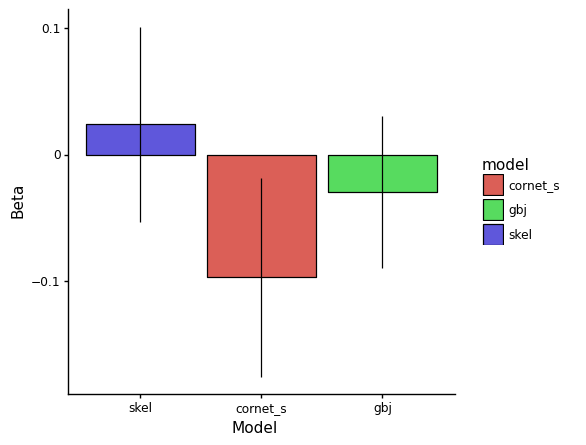

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/lPPC_spaceloc_rsa_bar.png


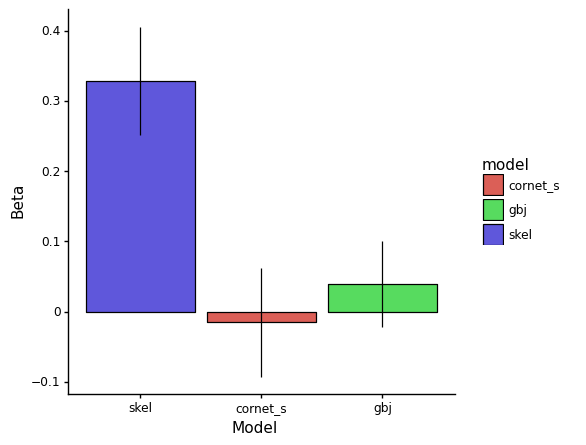

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/rPPC_spaceloc_rsa_bar.png


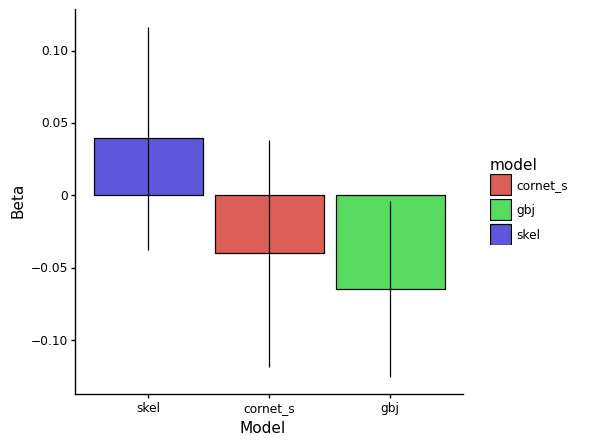

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/lAPC_spaceloc_rsa_bar.png


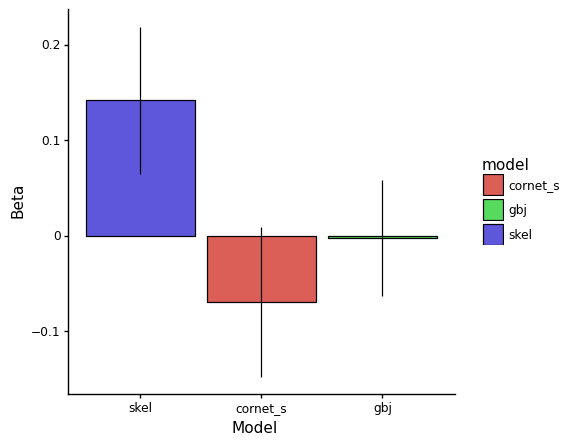

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/rAPC_spaceloc_rsa_bar.png


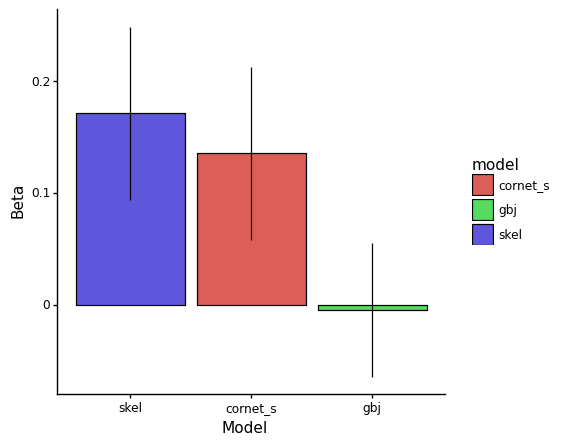

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/lLO_toolloc_rsa_bar.png


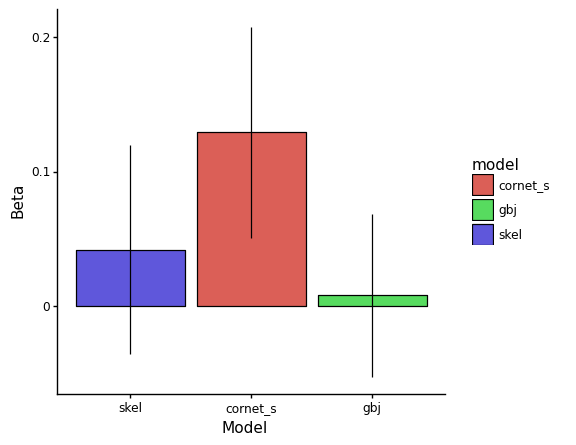

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/rLO_toolloc_rsa_bar.png


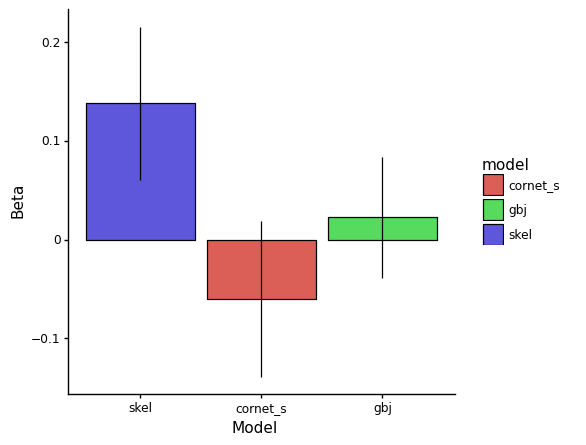

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/lPFS_toolloc_rsa_bar.png


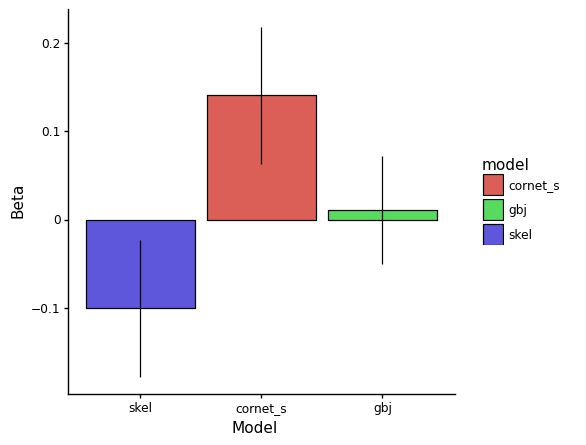

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 5 x 5 in image.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/vayzenbe/GitHub_Repos/docnet/figures/rPFS_toolloc_rsa_bar.png


IndexError: arrays used as indices must be of integer (or boolean) type

In [263]:
"""
RSA graphs for models
"""
df = pd.read_csv(f'/home/vayzenbe/GitHub_Repos/docnet/results/RSA_betas.csv')

for rr in rois:
    for lr in ['l', 'r']:
        curr_roi = df[df['roi'] == f'{lr}{rr}']
        curr_roi = pd.melt(curr_roi,id_vars='roi', var_name = 'model', value_name = 'Beta')
        
        
        curr_se = curr_roi.iloc[len(models):]
        curr_roi = curr_roi.iloc[0:len(models)]
        curr_roi['se'] = curr_se['Beta'].to_list()
        
        plot_rsa(curr_roi, 'Beta', f'{lr}{rr}')


In [264]:
def make_sym_matrix(n,vals):
    """
    Create symmetric matrix from vector
    """
    
    m = np.zeros([n,n], dtype=np.double)
    xs,ys = np.triu_indices(n,k=1)
    m[xs,ys] = vals
    m[ys,xs] = vals
    m[ np.diag_indices(n) ] = 0 - np.sum(m, 0)
    m[ np.diag_indices(n) ] = np.min(vals)
    return m

In [272]:
"""
Make neural RDMs
"""

rdms = pd.read_csv(f'{curr_dir}/modelling/rdms/all_rdms.csv')

rdms = (rdms-rdms.mean())/rdms.std()
for rr in rois:
    for lr in ['l','r']:
        #curr_rdm = obj_names[['obj1', 'obj2']]
        curr_rdm = rdms[f'{lr}{rr}']


        rdm_mat = make_sym_matrix(25, curr_rdm.to_numpy())
        sns.heatmap(rdm_mat, cmap='jet',cbar=False,xticklabels=False, yticklabels=False, square = True)
        plt.savefig(f'{fig_dir}/{lr}{rr}_rdm.png',dpi = 100,bbox_inches = 'tight', pad_inches= 0 )

        plt.close()
        print(rr)

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


PPC_spaceloc
PPC_spaceloc
APC_spaceloc
APC_spaceloc
LO_toolloc
LO_toolloc
PFS_toolloc
PFS_toolloc
APC_distloc
APC_distloc


In [289]:
"""
Make model RDMs
"""

rdms = pd.read_csv(f'{curr_dir}/modelling/rdms/all_rdms.csv')

rdms = (rdms-rdms.mean())/rdms.std()
for rr in models:
    #curr_rdm = obj_names[['obj1', 'obj2']]
    curr_rdm = rdms[f'{rr}']


    rdm_mat = make_sym_matrix(25, curr_rdm.to_numpy())
    sns.heatmap(rdm_mat, cmap='jet',cbar=False,xticklabels=False, yticklabels=False, square = True)
    plt.savefig(f'{fig_dir}/{rr}_rdm.png',dpi = 100,bbox_inches = 'tight', pad_inches= 0 )

    plt.close()
    print(rr)

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


skel
cornet_s
gbj


In [207]:
rois = ['lLO_toolloc', 'lPFS_toolloc', 'rLO_toolloc', 'rPFS_toolloc','rPPC_spaceloc', 'rAPC_spaceloc']

subj_summary=pd.DataFrame(columns = ['subj'] +[s + '_category' for s in rois] + [s + '_between' for s in rois])


for sn, ss in enumerate(subj_list):
    sub_dir = f'{study_dir}/sub-{ss}/ses-02/derivatives'
    results_dir = f'{sub_dir}/results/beta_summary/catmvpa'
    
    df = pd.read_csv(f'{results_dir}/mvpa_summary_combined.csv')
    print(ss, df['category'][df['roi'] == 'rPPC_spaceloc'])
             

docnet2001 12   -0.014651
Name: category, dtype: float64
docnet2002 12   -0.122906
Name: category, dtype: float64
docnet2003 9    0.061127
Name: category, dtype: float64
docnet2004 11    0.140157
Name: category, dtype: float64
docnet2005 10   -0.040399
Name: category, dtype: float64
docnet2007 11   -0.012091
Name: category, dtype: float64
docnet2008 7    0.018782
Name: category, dtype: float64
docnet2012 9    0.056329
Name: category, dtype: float64


In [200]:
[ss] + df['category'].to_list()
df
ss = 'docnet2005'
sub_dir = f'{study_dir}/sub-{ss}/ses-02/derivatives'
results_dir = f'{sub_dir}/results/beta_summary/catmvpa'
    
df = pd.read_csv(f'{results_dir}/mvpa_summary_combined.csv')
df

,roi,identity,category,between
0,lLO_toolloc,inf,-0.097605,-0.033570
1,lPFS_toolloc,inf,-0.045887,-0.042519
2,lPPC_spaceloc,inf,-0.100940,-0.048953
3,lAPC_spaceloc,inf,-0.088656,-0.035401
4,lPPC_distloc,inf,-0.107248,-0.045925
5,lAPC_distloc,inf,-0.152889,-0.033041
6,lPPC_toolloc,inf,-0.055894,-0.038158
7,lAPC_toolloc,inf,-0.084213,-0.040461
8,rLO_toolloc,inf,0.063590,-0.071369
9,rPFS_toolloc,inf,-0.101403,-0.032012


In [99]:
"""
Code snippet to do within vs. between using the combined RDM
"""

cond = []
df = pd.read_csv(f'{study_dir}/derivatives/results/catmvpa/allrois_rdm.csv')

cond = [df['stim1'].iloc[ii][:-2] ==df['stim2'].iloc[ii][:-2]  for ii in range(0, len(df['stim1']))]

df['cat'] = pd.Series(cond)

In [80]:
np.log((1 + .9) / (1 - .9))

2.9444389791664407

In [62]:
summary_df

,roi,Condition,Correlation,se
7,lAPC_distloc,identity,1.619022e-16,1.056951e-17
27,lAPC_distloc,category,1.067241e+00,2.598192e-02
47,lAPC_distloc,between,1.033412e+00,4.656103e-03
17,rAPC_distloc,identity,1.591320e-16,1.246428e-17
37,rAPC_distloc,category,9.995143e-01,4.238949e-02
57,rAPC_distloc,between,1.046446e+00,9.192203e-03


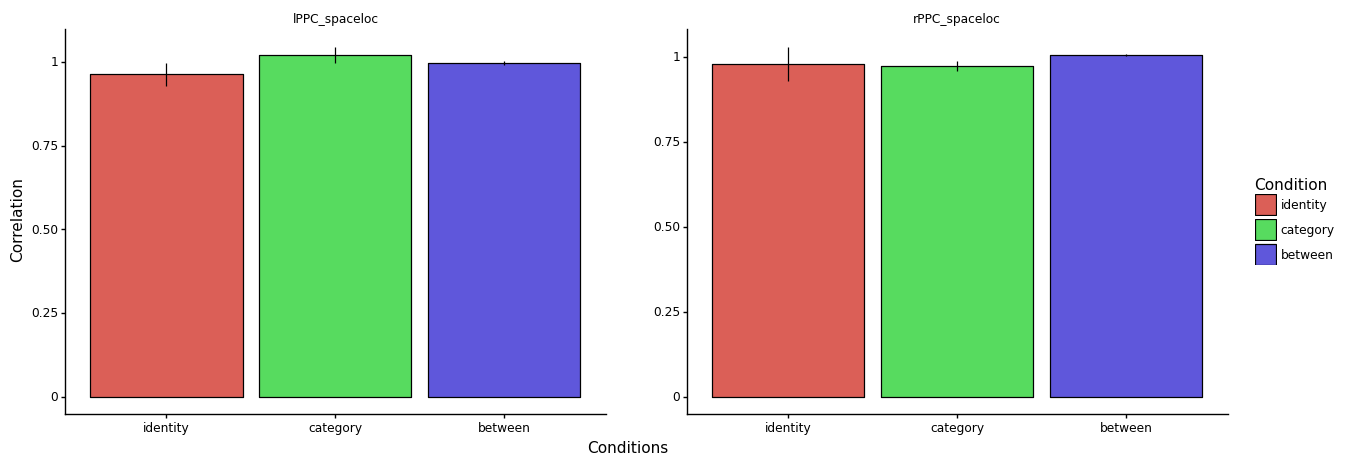

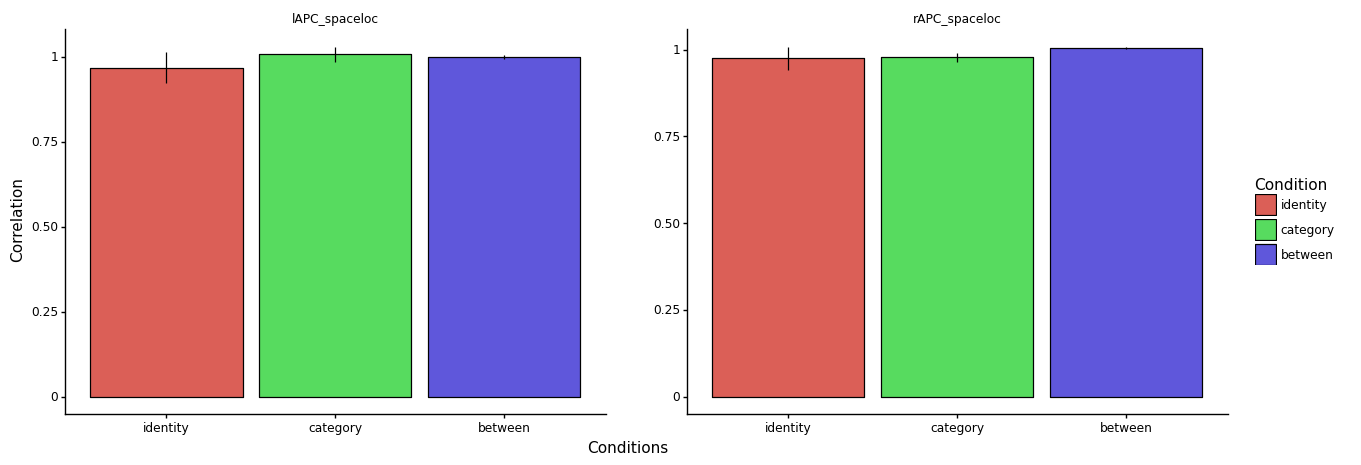

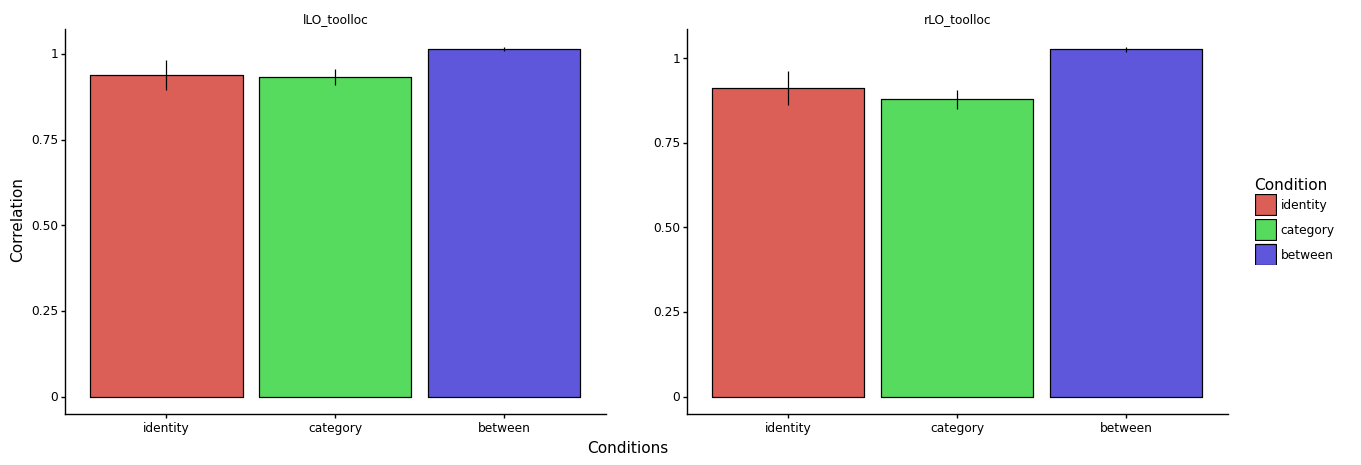

/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_col : Removed 6 rows containing missing values.
/home/vayzenbe/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_linerange : Removed 6 rows containing missing values.


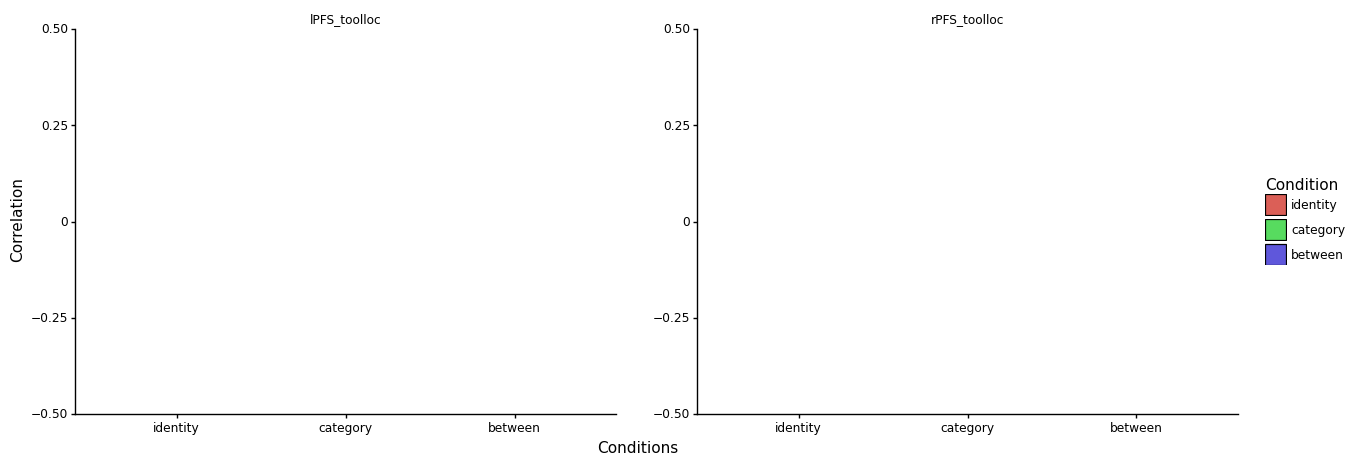

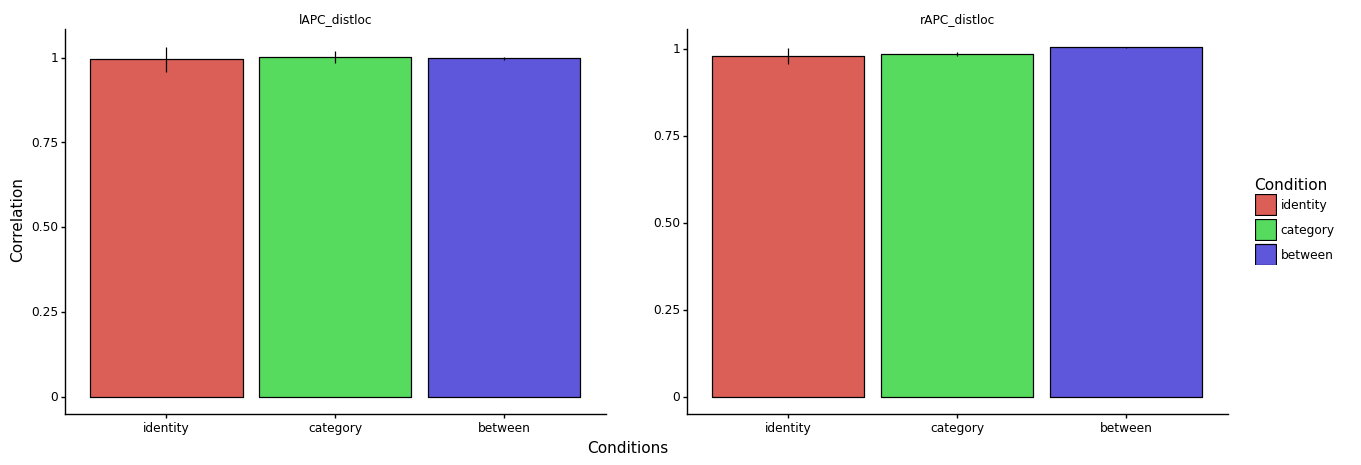

In [58]:
"""
Within/between mvpa for split-half
"""
data_type = "Correlation"
df = pd.read_csv(f'{study_dir}/derivatives/results/catmvpa/mvpa_summary_split.csv')

#pull out means and SEs seperately
df_mean = df[['roi', 'identity', 'category', 'between']]
df_se = df[['roi', 'identity_se', 'category_se', 'between_se']]

#melt dfs
df_mean = pd.melt(df_mean,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')
df_se = pd.melt(df_se,id_vars='roi', var_name = 'Condition', value_name = 'Correlation')

conds = ['identity', 'category', 'between']

for rn, rr in enumerate(rois):
    
    #Append correlations
    summary_df = df_mean[df_mean['roi'] == f'l{rr}']
    summary_df = summary_df.append(df_mean[df_mean['roi'] == f'r{rr}'])
    
    #combine SEs
    se_df = df_se[df_se['roi'] == f'l{rr}']['Correlation']
    se_df = se_df.append(df_se[df_se['roi'] == f'r{rr}']['Correlation'])
    
    summary_df['se'] = se_df
    

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, 'Correlation')


In [67]:
"""
Average Activation for each ROI
"""
data_type = "activations"

for rn, rr in enumerate(rois):

    summary_df =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])
    temp_summary =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])

    # load ROI 1
    df = pd.read_csv(f'{results_dir}/l{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    summary_df['Condition'] = df.index
    summary_df[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/l{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    summary_df[f'se']  = df_se.to_list()
    summary_df['ROI'] = f'l{roi_names[rn]}'

    #load ROI 2
    df = pd.read_csv(f'{results_dir}/r{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    temp_summary['Condition'] = df.index
    temp_summary[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/r{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    temp_summary['se']  = df_se.to_list()
    temp_summary['ROI'] = f'r{roi_names[rn]}'


    #combine
    summary_df = summary_df.append(temp_summary)

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, data_type.capitalize())


FileNotFoundError: [Errno 2] No such file or directory: '/lab_data/behrmannlab/vlad/docnet/derivatives/results/lPPC_spaceloc_mean_activations.csv'